# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
y = boston.values[1::2, 2]

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [4]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

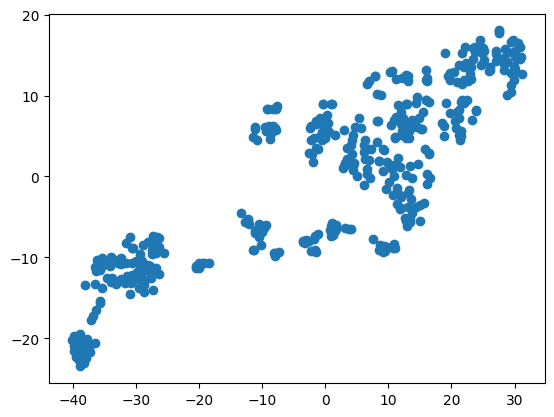

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [7]:
kmeans = KMeans(n_clusters=3, max_iter=100, n_init='auto', random_state=42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

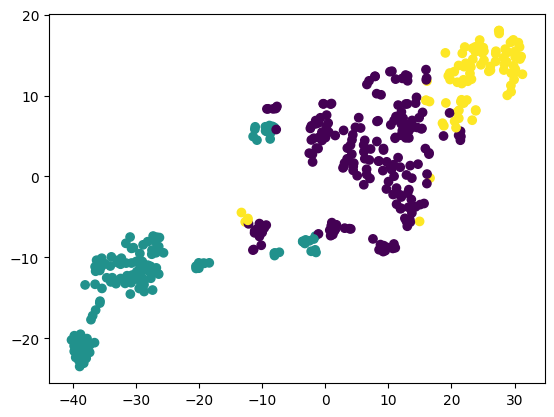

In [8]:
X_train_cls = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_cls)

Вычислите средние значения price и CRIM в разных кластерах.

In [9]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [22]:
data = pd.DataFrame(X_train, columns=feature_names)
data.insert(loc=0, column='price', value=y_train)
data.insert(loc=0, column='cls', value=X_train_cls)

In [23]:
pd.pivot_table(data, index='cls', aggfunc={'CRIM': np.mean, 'price': np.mean})

,CRIM,price
cls,,
0,0.420986,24.971204
1,10.715219,16.179688
2,0.072118,27.874118


## * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [30]:
X_test_cls = kmeans.predict(X_test_scaled)

In [32]:
data_test = pd.DataFrame(X_test, columns=feature_names)
data_test.insert(loc=0, column='price', value=y_test)
data_test.insert(loc=0, column='cls', value=X_test_cls)

In [33]:
pd.pivot_table(data, index='cls', aggfunc={'CRIM': np.mean, 'price': np.mean})

,CRIM,price
cls,,
0,0.266079,21.860784
1,10.165531,16.437143
2,0.062060,31.350000
